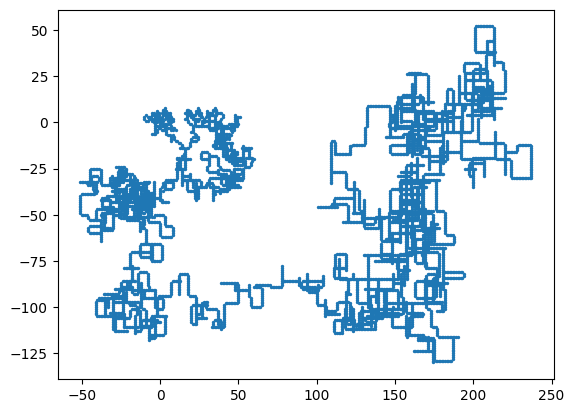

6026


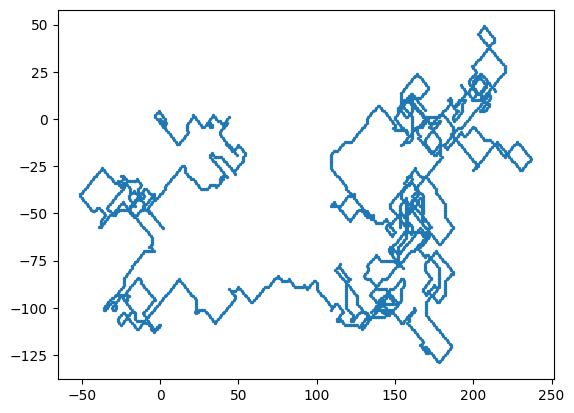

2273


In [36]:
import matplotlib.pyplot as plt

M = {"U": (0, 1), "D": (0, -1), "L": (-1, 0), "R": (1, 0)}

ME = {
    (0, 2): (0, 1),
    (0, -2): (0, -1),
    (2, 0): (1, 0),
    (-2, 0): (-1, 0),
    (1, 2): (1, 1),
    (2, 1): (1, 1),
    (2, 2): (1, 1),
    (-1, 2): (-1, 1),
    (-2, 1): (-1, 1),
    (-2, 2): (-1, 1),
    (1, -2): (1, -1),
    (2, -1): (1, -1),
    (2, -2): (1, -1),
    (-1, -2): (-1, -1),
    (-2, -1): (-1, -1),
    (-2, -2): (-1, -1),
}


def move(point, dir):
    return (point[0] + M[dir][0], point[1] + M[dir][1])


def move_tail(H, T):
    dx = H[0] - T[0]
    dy = H[1] - T[1]
    move = ME.get((dx, dy), (0, 0))
    return (T[0] + move[0], T[1] + move[1])


def sim(num_tails, file_name="input.txt"):
    steps = [x.split(" ") for x in open(file_name).read().splitlines()]
    visited = set()
    R = [(0, 0) for _ in range(num_tails)]

    visited.add(R[-1])
    for step in steps:
        for _ in range(int(step[1])):
            R[0] = move(R[0], step[0])
            for j in range(1, num_tails):
                R[j] = move_tail(R[j - 1], R[j])
            visited.add(R[-1])

    x = [x[0] for x in visited]
    y = [x[1] for x in visited]
    plt.scatter(x, y, s=2)
    plt.show()

    print(len(visited))


sim(2)
sim(10)
# 2290 too high